In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [2]:
#mount with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data preprocessing **

In [15]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')#(df(dataframe) is that format which undertood to pandas )
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
missing_values=df.isnull().sum()
print("Missing Values", missing_values)

missing_value_percentage= (missing_values/len(df))  * 100
print("Missing values in percentage",missing_value_percentage )

Missing Values User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Missing values in percentage User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64


In [19]:
# Drop the User ID column (not a useful feature).
df_new_dataset = df.drop('User ID', axis=1)
df_new_dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [20]:
# Encode the Gender column using Label Encoding or One-Hot Encoding

#clean the column before mapping  first conevrt it into string then consistent all values
df_new_dataset['Gender'] = df_new_dataset['Gender'].astype(str).str.strip().str.capitalize()
df_new_dataset['Gender'] = df_new_dataset['Gender'].map({'Male': 1, 'Female': 0})


df_new_dataset


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [21]:
# Encode the target variable Purchased.
df_new_dataset['Purchased'].value_counts()

#its already in 0 and 1 so it does not need for encode further

,count
Purchased,
0,257
1,143


In [22]:
# Standardize the feature columns (Age, EstimatedSalary).
scaler = StandardScaler()

features_to_scale = ['Age', 'EstimatedSalary']

# Fit scaler on data and transform
df_new_dataset[features_to_scale] = scaler.fit_transform(df_new_dataset[features_to_scale])

df_new_dataset


DataFrame after standardizing 'Age' and 'EstimatedSalary':
   Gender       Age  EstimatedSalary  Purchased
0       1 -1.781797        -1.490046          0
1       1 -0.253587        -1.460681          0
2       0 -1.113206        -0.785290          0
3       0 -1.017692        -0.374182          0
4       1 -1.781797         0.183751          0


# **2.	Model Building **

In [23]:
# Split the dataset into training and test sets (75/25).
X = df_new_dataset.drop('Purchased', axis=1)
y = df_new_dataset['Purchased']

# Split dataset: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Train the following models:

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")

# KNN with k=3,5,7
for k in [3, 5, 7]:
   knn3 = KNeighborsClassifier(n_neighbors=3)
   knn3.fit(X_train, y_train)
   knn3_pred = knn3.predict(X_test)

   knn5 = KNeighborsClassifier(n_neighbors=5)
   knn5.fit(X_train, y_train)
   knn5_pred = knn5.predict(X_test)

   knn7 = KNeighborsClassifier(n_neighbors=7)
   knn7.fit(X_train, y_train)
   knn7_pred = knn7.predict(X_test)

# Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_gini.predict(X_test)
print(f"Decision Tree (Gini) Accuracy: {accuracy_score(y_test, y_pred_dt_gini):.4f}")

# Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_dt_entropy = dt_entropy.predict(X_test)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_score(y_test, y_pred_dt_entropy):.4f}")


Gaussian Naive Bayes Accuracy: 0.9300
Decision Tree (Gini) Accuracy: 0.8400
Decision Tree (Entropy) Accuracy: 0.8400


# **Model Evaluation **

In [32]:
#function for all models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

  # Evaluate Gaussian Naive Bayes
evaluate_model(y_test, y_pred_gnb, "Gaussian Naive Bayes")

# Evaluate KNN for k=3, 5, 7
for k, y_pred_knn in zip([3, 5, 7], [knn3_pred, knn5_pred, knn7_pred]):
    evaluate_model(y_test, y_pred_knn, f"KNN (k={k})")

# Evaluate Decision Tree Gini
evaluate_model(y_test, y_pred_dt_gini, "Decision Tree (Gini)")

# Evaluate Decision Tree Entropy
evaluate_model(y_test, y_pred_dt_entropy, "Decision Tree (Entropy)")

--- Gaussian Naive Bayes ---
Accuracy:  0.9300
Precision: 0.9412
Recall:    0.8649
F1-Score:  0.9014
Confusion Matrix:
[[61  2]
 [ 5 32]]


--- KNN (k=3) ---
Accuracy:  0.9100
Precision: 0.8684
Recall:    0.8919
F1-Score:  0.8800
Confusion Matrix:
[[58  5]
 [ 4 33]]


--- KNN (k=5) ---
Accuracy:  0.9200
Precision: 0.8718
Recall:    0.9189
F1-Score:  0.8947
Confusion Matrix:
[[58  5]
 [ 3 34]]


--- KNN (k=7) ---
Accuracy:  0.9300
Precision: 0.8750
Recall:    0.9459
F1-Score:  0.9091
Confusion Matrix:
[[58  5]
 [ 2 35]]


--- Decision Tree (Gini) ---
Accuracy:  0.8400
Precision: 0.8000
Recall:    0.7568
F1-Score:  0.7778
Confusion Matrix:
[[56  7]
 [ 9 28]]


--- Decision Tree (Entropy) ---
Accuracy:  0.8400
Precision: 0.8000
Recall:    0.7568
F1-Score:  0.7778
Confusion Matrix:
[[56  7]
 [ 9 28]]




# **Visualizing Performance**

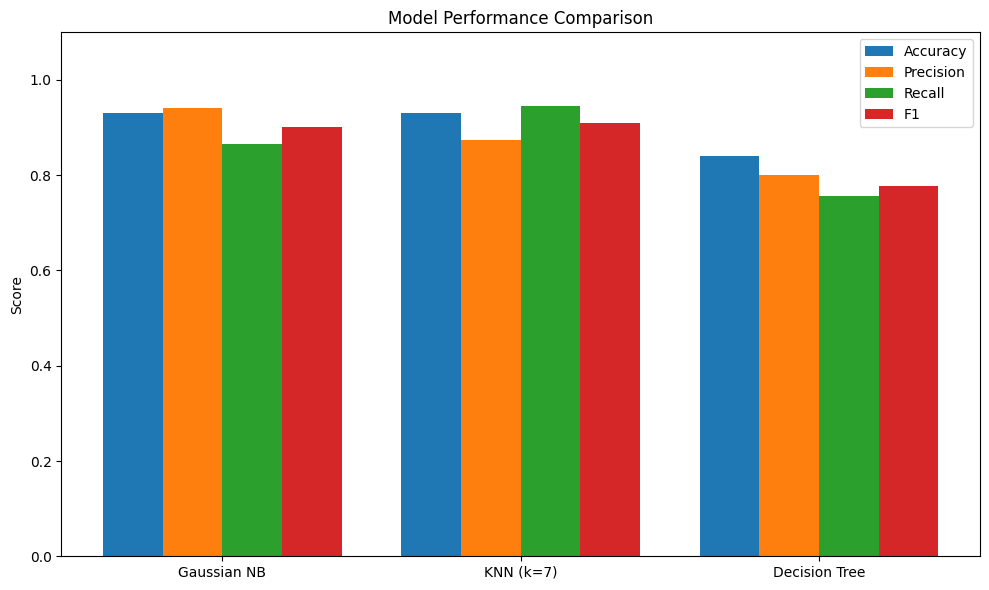

In [34]:


# Dictionary of model performance results
model_results = {
    'Gaussian NB': {'accuracy': 0.9300, 'precision': 0.9412, 'recall': 0.8649, 'f1': 0.9014},
    'KNN (k=7)': {'accuracy': 0.93, 'precision': 0.8750, 'recall': 0.9459, 'f1': 0.9091},
    'Decision Tree': {'accuracy': 0.84, 'precision': 0.80, 'recall': 0.7568, 'f1': 0.7778}
}

metrics = ['accuracy', 'precision', 'recall', 'f1']
models = list(model_results.keys())

# Extract metric values per model
scores = {metric: [model_results[model][metric] for model in models] for metric in metrics}

# Plotting
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width*1.5, scores[metric], width, label=metric.capitalize())

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()
